# Plotting code for summary of ICON-ModEx iterations
Note that the results of the Cross Validation (CV) are suspect - there is a *repeating pattern* in some of the results in a process that should be entirely random.

1. I included the `cv_std` of the cross-validation (CV) iterations for the manual ICON-ModEx iterations b/c that's the only measure we have for each individual iteration of the historical ModEx iterations, despite its possible flaws. This is in the raw data files, but not plotted.
2. For the manual ICON-ModEx iterations, some of the `cv_avg` (average over the scores of 5 CV iterations of the same model) and `hold-out` (the score of a single model, the "offical" model of that iteration) differ by considerable amounts.  Therefore, I select the maximum value to plot because they are each different estimates for the accuracy of the model.
3. Due to issues with CV, CV was turned off for the fully automated ICON-ModEx iterations spanning Jul-2022 to (at least) May-2023. There, the uncertainty is estimated by training several independent models and averaging over the scores of the models. For the cases where model score is negative (i.e. Guessing the average respiration rate is better than using the model! This is also known as a persistence forecast doing better than the model.), the model score was "floored" to 0 for inclusion in the average.
4. The manual ICON-ModEx iterations are in a separate source file/dataframe than the automated ICON-ModEx iterations for transparency in plotting.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
icon_modex_manual = pd.read_csv('ICON_ModEx_manual_iterations.csv')
icon_modex_auto = pd.read_csv('ICON_ModEx_automated_iterations.csv')
icon_modex_log10 = pd.read_csv('ICON_ModEx_log10_iterations.csv')

In [3]:
icon_modex_manual

,Job_ID,date,hold-out,cv_avg,cv_std,ntrain
0,58356,2021.12,0.016,0.12100,0.0800,134
1,60166,2022.07,-0.591,0.07200,0.1120,156
2,60207,2022.08,0.118,0.03600,0.0970,170
3,60301,2022.09,0.196,0.01600,0.1720,287
4,60357,2022.10,0.250,-0.05900,0.2530,296
5,60466,2022.11,0.271,-0.08400,0.2240,309
6,60501,2022.12,0.396,0.03930,0.1090,323
7,60534,2023.01,0.513,0.03620,0.0789,332
8,60601,2023.02,0.353,0.00696,0.0935,343
9,60629,2023.03,0.243,0.02501,0.0623,354


In [4]:
# Compare this column with the full data frame, above.
icon_modex_manual[['hold-out','cv_avg']].max(axis=1)

0    0.121
1    0.072
2    0.118
3    0.196
4    0.250
5    0.271
6    0.396
7    0.513
8    0.353
9    0.243
dtype: float64

In [5]:
icon_modex_auto

,Job_ID,date,hold-out-avg,hold-out-std,ntrain
0,58431,2022.07,0.0490,0.0723,163
1,58430,2022.08,0.0880,0.0539,177
2,58429,2022.09,0.2207,0.1342,293
3,58428,2022.10,0.2104,0.0882,302
4,58427,2022.11,0.2017,0.0923,315
5,58425,2022.12,0.2526,0.1065,329
6,58421,2023.01,0.1609,0.1221,337
7,58423,2023.02,0.2566,0.1333,348
8,58424,2023.03,0.2504,0.0481,360
9,58252,2023.04,0.2538,0.1502,375


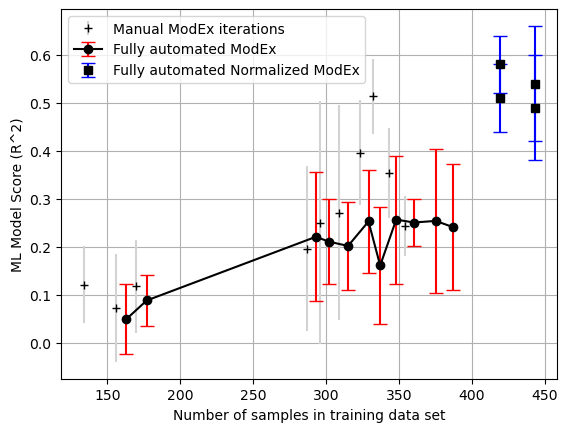

In [6]:
fig, ax = plt.subplots()
plt.errorbar(
    icon_modex_manual['ntrain'],
    icon_modex_manual[['hold-out','cv_avg']].max(axis=1),
    yerr=icon_modex_manual['cv_std'],
    fmt='k+',
    ecolor='lightgray',
    capsize=0)
plt.errorbar(
    icon_modex_auto['ntrain'],
    icon_modex_auto['hold-out-avg'],
    yerr=icon_modex_auto['hold-out-std'],
    fmt='ko-',
    ecolor='r',
    capsize=5)
plt.errorbar(
    icon_modex_log10['ntrain'],
    icon_modex_log10['hold-out-avg'],
    icon_modex_log10['hold-out-std'],
    fmt='ks',
    ecolor='b',
    capsize=5)
ax.grid()
plt.ylabel('ML Model Score (R^2)')
plt.xlabel('Number of samples in training data set')
plt.legend(['Manual ModEx iterations','Fully automated ModEx','Fully automated Normalized ModEx'])
plt.savefig('ICON_ModEx_summary.pdf')

**Caption:** Model score for each ModEx iteration versus the number of samples used to train the machine learning (ML) models. These ModEx iterations span the model presented during the Dec. 2021 Community Meeting (plus sign in lower left corner) until the May 2023 iteration.  Manual ModEx iterations (plus signs) are the model score for a single SuperLearner stacked ensemble model with uncertainty based on 1 standard deviation of the model scores after 5-fold cross validation (CV). Field sampling was directed based on the output of the manual ModEx iterations through March 2023 (360 training samples).  April and May 2023 field sampling was directed based on the output of the fully automated ModEx iterations. Fully automated ModEx iterations (block dots connected by a line) use a new workflow which trains 10 SuperLearner stacked ensemble models and the values reported here are the average and standard deviation among the 10 models. The fully automated workflow was also used to "hindcast" ModEx iterations before April 2023 to provide additional context for the manual ModEx iterations. For the hindcast, the fully automated workflow was driven by nearly the same data as was available for the manual ModEx iterations (the fully automated workflow had access to 7 to 9 additional historical data points from S19S that were omitted in the manual iterations). The large horizontal gap in the plot corresponds to a large influx of data at the very end of the summer of 2022.

The peak of the manual iterations (e.g. outlier at ~340 samples, Jan-2023) falls outside the range of uncertainty of model score shown here, which is only a +/- 1 std envelope. At +/- 2 std, they would overlap. The SuperLearner configuration did not change during this period aside for very minor changes to accomodate new releases of `scikit-learn` over the roughy year and half time span that this figure represents. I interpret this plot as showing a steady (within the limits of uncertainty) increase in model score as ModEx iterations progress.